This Jupyter Notebook plots and analyzes protein-detected 1H-15N nuclear magnetic resonance spectroscopy (NMR) Heteronuclear Single Quantum Coherence (HSQC) data of non-structural protein 5A, domains 2 and 3 (NS5A-D2D3) in the absence and presence of varying concentrations of 5-fluoroindole. Data should first be downloaded from Zenodo as detailed in ../README.md. Spectra are in .ft2 format. Metadata with peak positions and heights are also included as text files in .list format. The file 'cs_stat_aa_filt.xlsx' demonstrates how 1H and 15N scaling factors for chemical shift differences were calculated. 

In [1]:
# Import useful stuff
%matplotlib inline
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FormatStrFormatter

In [2]:
# Import .ft2 files 
D2D3_0uM5FI_dic, D2D3_0uM5FI_data = ng.pipe.read('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_0uM5FI.ft2')
D2D3_160uM5FI_dic, D2D3_160uM5FI_data = ng.pipe.read('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_160uM5FI.ft2')
D2D3_3200uM5FI_dic, D2D3_320uM5FI_data = ng.pipe.read('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_320uM5FI.ft2')

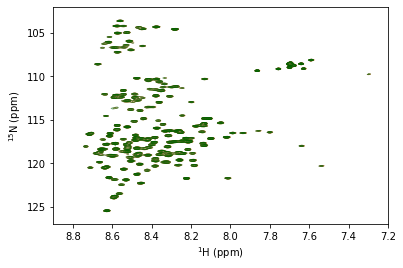

In [3]:
# Plot HSQC data

# Get data in ppm
udic=ng.pipe.guess_udic(D2D3_0uM5FI_dic,D2D3_0uM5FI_data)
ppmScale=[]
ppm2pts=[]
pts2ppm=[]
for i in range(2):
    ppmScale.append( ng.fileiobase.unit_conversion(udic[i]['size'],True,udic[i]['sw'],udic[i]['obs'],udic[i]['car']).ppm_scale()  )

# Set plot parameters
contour_start = 6000000           # Contour level start value
contour_num = 20                  # Number of contour levels
contour_factor = 1.20             # Scaling factor between contour levels
cl = contour_start * contour_factor ** np.arange(contour_num) # Calculate contour levels

# Make plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot 40uM D2D3 with 160uM 5-fluoroindole
ax.contour(D2D3_160uM5FI_data, cl, colors='sandybrown', linewidths=.3,
              extent=(ppmScale[1][0], ppmScale[1][-1], ppmScale[0][0], ppmScale[0][-1]))
# Plot 40uM D2D3 with 320uM 5-fluoroindole
ax.contour(D2D3_320uM5FI_data, cl, colors='sienna', linewidths=.3,
              extent=(ppmScale[1][0], ppmScale[1][-1], ppmScale[0][0], ppmScale[0][-1]))
# Plot 40uM D2D3 with 0uM 5-fluoroindole
ax.contour(D2D3_0uM5FI_data, cl, colors='darkgreen', linewidths=0.3,
              extent=(ppmScale[1][0], ppmScale[1][-1], ppmScale[0][0], ppmScale[0][-1]))
# Plot formatting
ax.set_ylabel("$^{15}$N (ppm)")
ax.set_xlabel("$^{1}$H (ppm)")
ax.set_xlim(8.9, 7.2)
ax.set_ylim(127, 102)

plt.show()

In [4]:
# Import metadata with peak positions and heights.

# 40uM D2D3 with 0uM 5-fluoroindole
d_40uMD2D3_0uM5FI_w1=np.loadtxt('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_0uM5FI.list', usecols=1, skiprows=1) # 15N chemical shifts
d_40uMD2D3_0uM5FI_w2=np.loadtxt('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_0uM5FI.list', usecols=2, skiprows=1) # 1H chemical shifts
d_40uMD2D3_0uM5FI_height=np.loadtxt('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_0uM5FI.list', usecols=3, skiprows=1) # Intensities
d_40uMD2D3_0uM5FI_assign=np.loadtxt('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_0uM5FI.list', usecols=0, skiprows=1, dtype=str) # Assignments

# 40uM D2D3 with 160uM 5-fluoroindole
d_40uMD2D3_160uM5FI_w1=np.loadtxt('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_160uM5FI.list', usecols=1, skiprows=1) # 15N chemical shifts
d_40uMD2D3_160uM5FI_w2=np.loadtxt('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_160uM5FI.list', usecols=2, skiprows=1) # 1H chemical shifts
d_40uMD2D3_160uM5FI_height=np.loadtxt('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_160uM5FI.list', usecols=3, skiprows=1) # Intensities
d_40uMD2D3_160uM5FI_assign=np.loadtxt('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_160uM5FI.list', usecols=0, skiprows=1, dtype=str) # Assignments

# 40uM D2D3 with 320uM 5-fluoroindole
d_40uMD2D3_320uM5FI_w1=np.loadtxt('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_320uM5FI.list', usecols=1, skiprows=1) # 15N chemical shifts
d_40uMD2D3_320uM5FI_w2=np.loadtxt('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_320uM5FI.list', usecols=2, skiprows=1) # 1H chemical shifts
d_40uMD2D3_320uM5FI_height=np.loadtxt('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_320uM5FI.list', usecols=3, skiprows=1) # Intensities
d_40uMD2D3_320uM5FI_assign=np.loadtxt('../Data/1H_15N_HSQC_ft2_and_metadata/40uMD2D3_320uM5FI.list', usecols=0, skiprows=1, dtype=str) # Assignments

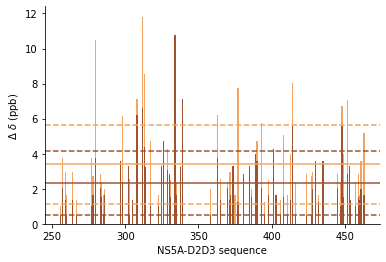

In [5]:
# Plot chemical shift difference per residue

# Calculate chemical shift differences (for both 1H and 15N) with and without 5-fluoroindole
# Scaling factors (B_15N=3.865 and B_1HN=0.628) were determined based on average values in the 
# BMRB, as illustrated in the file cs_stat_aa_filt.xlsx (in HSQC data directory).
diff_vals_160 = np.sqrt(((d_40uMD2D3_0uM5FI_w1-d_40uMD2D3_160uM5FI_w1)**2/3.865)+((d_40uMD2D3_0uM5FI_w2-d_40uMD2D3_160uM5FI_w2)**2/0.628))
diff_vals_320 = np.sqrt(((d_40uMD2D3_0uM5FI_w1-d_40uMD2D3_320uM5FI_w1)**2/3.865)+((d_40uMD2D3_0uM5FI_w2-d_40uMD2D3_320uM5FI_w2)**2/0.628))


# Convert assignments to list of numbers
resid = list(map(lambda each:each.strip("N-H"), d_40uMD2D3_0uM5FI_assign))
nums_only = [e[1:] for e in resid]


# Make plot, multiplying by 10**3 to convert from ppm to ppb
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(np.asarray([float(i) for i in nums_only]),10**3*diff_vals_160,color='sandybrown')
ax.bar(np.asarray([float(i) for i in nums_only]),10**3*diff_vals_320,color='sienna')
ax.axhline(y=10**3*np.mean(diff_vals_160), color='sandybrown', linestyle='-')
ax.axhline(y=10**3*(np.mean(diff_vals_160)-np.std(diff_vals_160)), color='sandybrown', linestyle='--')
ax.axhline(y=10**3*(np.mean(diff_vals_160)+np.std(diff_vals_160)), color='sandybrown', linestyle='--')
ax.axhline(y=10**3*np.mean(diff_vals_320), color='sienna', linestyle='-')
ax.axhline(y=10**3*(np.mean(diff_vals_320)-np.std(diff_vals_320)), color='sienna', linestyle='--')
ax.axhline(y=10**3*(np.mean(diff_vals_320)+np.std(diff_vals_320)), color='sienna', linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('NS5A-D2D3 sequence')
ax.set_ylabel('$\Delta$ $\delta$ (ppb)')
plt.show()


In [6]:
# Find which residues have biggest CSPs in the presence of 160 uM 5-fluoroindole
resid_diffs_big_160 = diff_vals_160>(np.mean(diff_vals_160)+np.std(diff_vals_160))
index_diffs_big_160 = d_40uMD2D3_160uM5FI_assign[resid_diffs_big_160]
print('Residues have biggest CSPs in the presence of 160 uM 5-fluoroindole are', ', '.join(map(str, index_diffs_big_160)))

Residues have biggest CSPs in the presence of 160 uM 5-fluoroindole are L280N-H, C298N-H, A308N-H, W312N-H, A313N-H, T334N-H, T363N-H, G377N-H, A393N-H, S414N-H, S448N-H, S452N-H


In [7]:
# Find which residues have biggest CSPs in the presence of 320 uM 5-fluoroindole
resid_diffs_big_320 = diff_vals_320>(np.mean(diff_vals_320)+np.std(diff_vals_320))
index_diffs_big_320 = d_40uMD2D3_320uM5FI_assign[resid_diffs_big_320]
print('Residues have biggest CSPs in the presence of 320 uM 5-fluoroindole are', ', '.join(map(str, index_diffs_big_320)))

Residues have biggest CSPs in the presence of 320 uM 5-fluoroindole are A308N-H, W312N-H, A313N-H, R326N-H, T334N-H, A339N-H, S401N-H, S414N-H, S448N-H


In [8]:
# Find which residues have biggest CSPs in both concentrations of 5-fluoroindole
intersection = list(set(index_diffs_big_160) & set(index_diffs_big_320))
print('Residues have biggest CSPs in the presence of both 160 and 320 uM 5-fluoroindole are', ', '.join(map(str, intersection)))

Residues have biggest CSPs in the presence of both 160 and 320 uM 5-fluoroindole are T334N-H, A308N-H, S414N-H, W312N-H, A313N-H, S448N-H


In [9]:
# Find which residue and index has the maximum value for NS5A-D2D3 in the absence of 5-fluoroindole
resid_max = d_40uMD2D3_0uM5FI_assign[np.where(d_40uMD2D3_0uM5FI_height == d_40uMD2D3_0uM5FI_height.max())[0][0]]
index_max = np.where(d_40uMD2D3_0uM5FI_height == d_40uMD2D3_0uM5FI_height.max())[0][0]
print('Residue with max intensity in the apo form is', resid_max)
print('The index of this residue is', index_max)

Residue with max intensity in the apo form is A393N-H
The index of this residue is 48


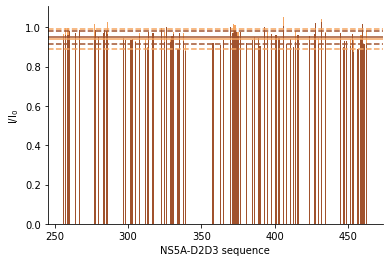

In [10]:
# Plot intensity difference per residue

# Normalize each dataset to the max index value (see cell above)
d_40uMD2D3_0uM5FI_height_norm = d_40uMD2D3_0uM5FI_height/d_40uMD2D3_0uM5FI_height[48]
d_40uMD2D3_160uM5FI_height_norm = d_40uMD2D3_160uM5FI_height/d_40uMD2D3_160uM5FI_height[48]
d_40uMD2D3_320uM5FI_height_norm = d_40uMD2D3_320uM5FI_height/d_40uMD2D3_320uM5FI_height[48]

# Calculate I/I_0 values relative to absence of 5-fluoroindole
i_i0_160uM = d_40uMD2D3_160uM5FI_height_norm/d_40uMD2D3_0uM5FI_height_norm
i_i0_320uM = d_40uMD2D3_320uM5FI_height_norm/d_40uMD2D3_0uM5FI_height_norm

# Make plot 
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(np.asarray([float(i) for i in nums_only]),i_i0_160uM, color='sandybrown')
ax.bar(np.asarray([float(i) for i in nums_only]),i_i0_320uM, color='sienna')
ax.axhline(y=np.mean(i_i0_160uM), color='sandybrown', linestyle='-')
ax.axhline(y=(np.mean(i_i0_160uM)-np.std(i_i0_160uM)), color='sandybrown', linestyle='--')
ax.axhline(y=(np.mean(i_i0_160uM)+np.std(i_i0_160uM)), color='sandybrown', linestyle='--')
ax.axhline(y=np.mean(i_i0_320uM), color='sienna', linestyle='-')
ax.axhline(y=(np.mean(i_i0_320uM)-np.std(i_i0_320uM)), color='sienna', linestyle='--')
ax.axhline(y=(np.mean(i_i0_320uM)+np.std(i_i0_320uM)), color='sienna', linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('NS5A-D2D3 sequence')
ax.set_ylabel('I/I$_0$')
plt.show()

In [11]:
# Calculate differences between NS5A-D2D3 in the presence and absence of 5-fluoroindole 

# for 15N
w1_160_diffs = np.sqrt((d_40uMD2D3_0uM5FI_w1-d_40uMD2D3_160uM5FI_w1)**2)#15N
w1_320_diffs = np.sqrt((d_40uMD2D3_0uM5FI_w1-d_40uMD2D3_320uM5FI_w1)**2)

# for 1H
w2_160_diffs = np.sqrt((d_40uMD2D3_0uM5FI_w2-d_40uMD2D3_160uM5FI_w2)**2)
w2_320_diffs = np.sqrt((d_40uMD2D3_0uM5FI_w2-d_40uMD2D3_320uM5FI_w2)**2)

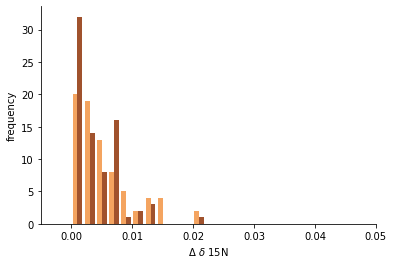

In [12]:
# Make histogram of 15N chemical shift (w1) perturbations
bin_edges = np.arange(0,0.05,.002)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist([w1_160_diffs,w1_320_diffs], color = ['sandybrown','sienna'], 
         bins = bin_edges, alpha=1)

ax.set_xlim(-0.005, 0.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.set_xlabel("$\Delta$ $\delta$ 15N")
ax.set_ylabel("frequency")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

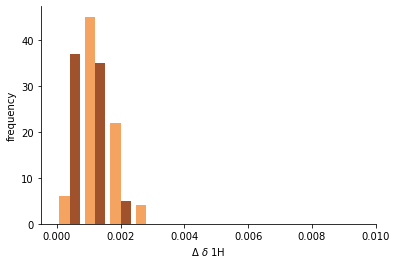

In [13]:
# Make histogram of 1H chemical shift (w2) perturbations
bin_edges = np.arange(0,0.02,.0008)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist([w2_160_diffs,w2_320_diffs], color = ['sandybrown','sienna'], 
         bins = bin_edges, alpha=1)

ax.set_xlim(-0.0005, 0.01)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.set_xlabel("$\Delta$ $\delta$ 1H")
ax.set_ylabel("frequency")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.show()

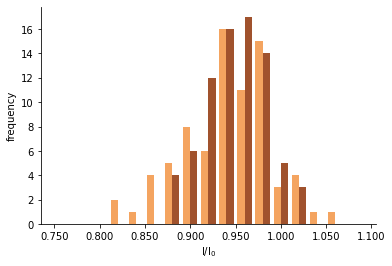

In [14]:
# Make histogram of 1H chemical shift (w2) perturbations
bin_edges = np.arange(0.75,1.1,.02)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist([i_i0_160uM,i_i0_320uM], color = ['sandybrown','sienna'], 
         bins = bin_edges, alpha=1)

#ax.set_xlim(-0.0005, 0.01)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.set_xlabel("I/I$_0$")
ax.set_ylabel("frequency")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.show()